# Reading CSV file

In [1]:
# https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data
# 1) click exportar
# 2) Descargar CSV
# 3) paste Casos_positivos_de_COVID-19_en_Colombia.csv in cloning path

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)
import matplotlib.dates as mdates
import datetime

In [217]:
import pandas as pd
alldata= pd.read_csv('Casos_positivos_de_COVID-19_en_Colombia.csv',parse_dates=True,infer_datetime_format=True)

cols= alldata.columns
#print("Old, cols: \n",cols)
unintcols=[0,1,2,4,5,9,10,11,15,16,17,18,19,20,21]
newdata=alldata.drop(columns=cols[unintcols] )
newcols=newdata.columns
print("New, cols: \n",newcols)

/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


New, cols: 
 Index(['Ciudad de ubicación', 'Edad', 'Sexo', 'Tipo', 'Fecha de muerte',
       'Fecha diagnostico', 'Fecha recuperado'],
      dtype='object')


In [298]:
def plot_newcases(data, cityname, population, idx=0,freq='7D'):
    colors=['black','red', 'blue', 'green', 'gray']
    cityframe= data.loc[data['Ciudad de ubicación']==cityname]
    field='Fecha diagnostico'
    f_diag= pd.DataFrame( cityframe[field])
    f_diag[field]=pd.to_datetime(f_diag[field])
    group= f_diag.groupby(pd.Grouper(key=field, freq=freq))[field].count()*(100000/population)
    group=group[0:-1]
    #group= f_diag.groupby(pd.Grouper(key=field, freq=freq))[field].count()
    group.plot(label=cityname, legend=cityname, color=colors[idx])

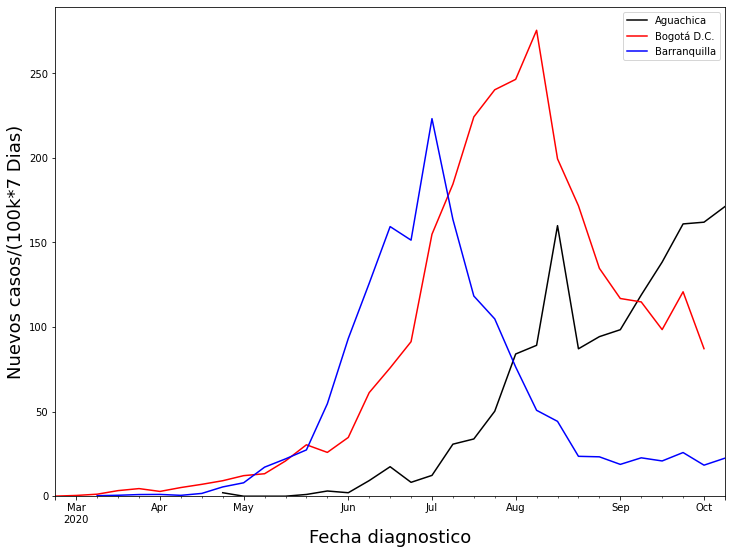

In [302]:
import numpy as np
cities=np.array(['Aguachica', 'Bogotá D.C.', 'Bucaramanga', 'Valledupar', 'Ocaña', 
                 'Barranquilla','Medellín','Cali'])
poblacion=np.array([97525, 10700000, 1141671, 490075, 101158, 2370753, 3731447,3400000])
inds=[0,1,5]
cities=cities[inds]
poblacion=poblacion[inds]
for i,city in enumerate(cities):
    plot_newcases(newdata, city, poblacion[i], idx=i, freq='7D')
    
plt.xlabel(r"Fecha diagnostico", fontsize=18)
plt.ylabel(r"Nuevos casos/(100k*7 Dias)", fontsize=18)
plt.ylim(0)
#plt.yscale('log')
plt.savefig("Diagnosticospositivos_vs_time.png", dpi=200)